<a href="https://colab.research.google.com/github/pablex72/research-camp-time-ser/blob/main/SVM_SVR_update_20a_without_normalized_NDVI_train_test_R20_653_rmse_0_0955_onCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
df = pd.read_csv("/content/interpolated_data_drop_one.csv")
df

,Date,NDVI
0,1/26/2019,0.740505
1,1/31/2019,0.689392
2,2/5/2019,0.632955
3,2/10/2019,0.573681
4,2/15/2019,0.514055
...,...,...
276,11/6/2022,0.114147
277,11/11/2022,0.130934
278,11/16/2022,0.149965
279,11/21/2022,0.171241


# Lagging

Predicting the next 'NDVI' value based on the current value, using lag of '-1'.

In [3]:
# Build the target, the next NDVI value
df['Target'] = df['NDVI'].shift(-1) # Target NDVI will be the next Sample
target_df = df[:-1]
target_df

,Date,NDVI,Target
0,1/26/2019,0.740505,0.689392
1,1/31/2019,0.689392,0.632955
2,2/5/2019,0.632955,0.573681
3,2/10/2019,0.573681,0.514055
4,2/15/2019,0.514055,0.456561
...,...,...,...
275,11/1/2022,0.099605,0.114147
276,11/6/2022,0.114147,0.130934
277,11/11/2022,0.130934,0.149965
278,11/16/2022,0.149965,0.171241


# Plotting Full Dataset

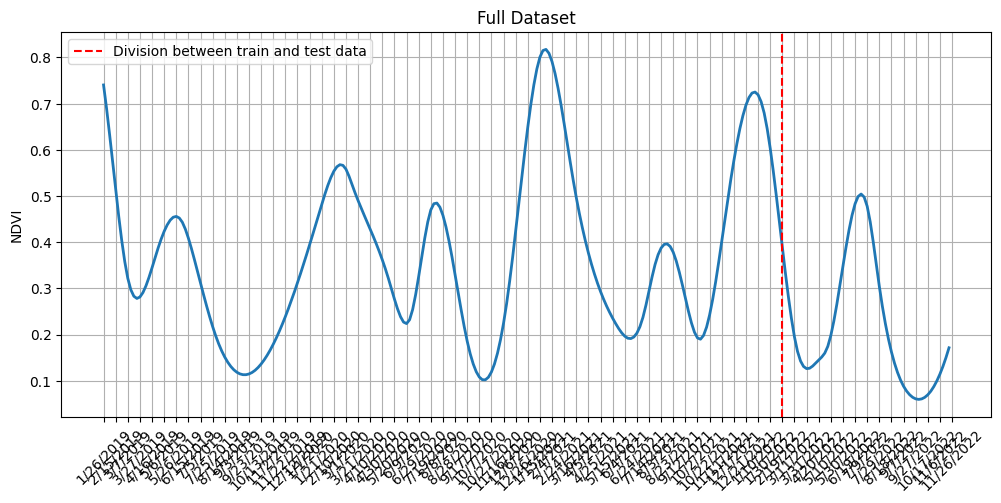

In [4]:
#Plotting the Full Dataset
fig, ax = plt.subplots(figsize=(12, 5))
index_80_percent = int(len(df) * 0.8)

ax.plot(target_df['NDVI'], linewidth=2)
ax.set_xticks(range(0, len(df['Date'].values), 4))
ax.set_xticklabels(df['Date'].values[::4], rotation=45)
ax.set_ylabel('NDVI') # set the label for the y-axis
ax.set_title('Full Dataset')
ax.axvline(df.index[index_80_percent], 0, 1, label='Division between train and test data', c='r', linestyle='--')
ax.legend()
ax.grid(True)
plt.show()

# Splitting

In [5]:
# Creating Feature and Target with X and y respectively
X = target_df[['NDVI', 'Target']].values[:,:1]
y = target_df[['NDVI', 'Target']].values[:,1:]

In [6]:
X.shape, y.shape
#((124, 1), (124, 1))

((280, 1), (280, 1))

In [7]:
# Spliting the data into train(80%) and test(20%) parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=False)
# Splitting the dates
train_dates = target_df.Date[:int(len(X)*0.80)]
test_dates =  target_df.Date[int(len(X)*0.80):]

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#((99, 1), (25, 1), (99, 1), (25, 1))

((224, 1), (56, 1), (224, 1), (56, 1))

# Plotting Training and Testing data

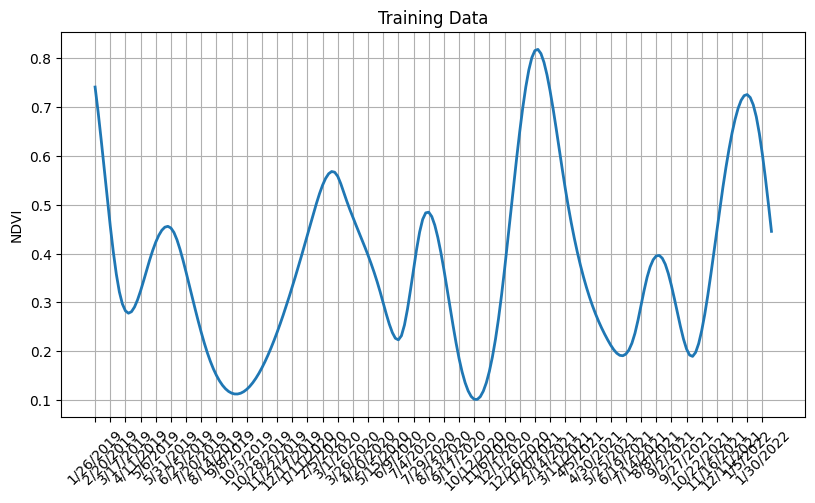

In [9]:
#Plot Training Data
fig, ax = plt.subplots(figsize=(9.6, 5))
ax.plot(X_train, linewidth=2)

ax.set_xticks(range(0, len(train_dates.values), 5))
ax.set_xticklabels(train_dates.values[::5], rotation=45)

ax.set_title('Training Data')
ax.set_ylabel('NDVI')

ax.grid(True)
plt.show()

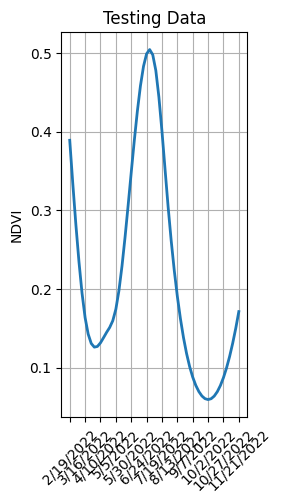

In [10]:
#Plot Testing Data
fig, ax = plt.subplots(figsize=(2.4, 5))
ax.plot(X_test, linewidth=2)

ax.set_xticks(range(0, len(test_dates.values), 5))
ax.set_xticklabels(test_dates.values[::5], rotation=45)

ax.set_title('Testing Data')
ax.set_ylabel('NDVI') # set the label for the y-axis
ax.grid(True)
plt.show()

# Model

In [11]:
# B-spline and Ridge Regression
# Cubic Spline

#regression_model = make_pipeline(SplineTransformer(n_knots=4, degree=3), Ridge(alpha=1e-3))
#regression_model.fit(X_train, y_train)

In [12]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Linear Kernel
regressor_linear = SVR(kernel='linear')
regressor_linear.fit(X_train, y_train)
y_pred_linear = regressor_linear.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
mse_linear = mean_squared_error(y_test, y_pred_linear, squared=True)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print("Linear Kernel:")
print("R^2 score:", r2_linear)
print("RMSE:", rmse_linear)
print("MSE:", mse_linear)
print("MAE:", mae_linear)
print()

# Polynomial Kernel (degree=3)
regressor_poly = SVR(kernel='poly', degree=3)
regressor_poly.fit(X_train, y_train)
y_pred_poly = regressor_poly.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
mse_poly = mean_squared_error(y_test, y_pred_poly, squared=True)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
print("Polynomial Kernel (degree=3):")
print("R^2 score:", r2_poly)
print("RMSE:", rmse_poly)
print("MSE:", mse_poly)
print("MAE:", mae_poly)
print()

# RBF Kernel
regressor_rbf = SVR(kernel='rbf')
regressor_rbf.fit(X_train, y_train)
y_pred_rbf = regressor_rbf.predict(X_test)
r2_rbf = r2_score(y_test, y_pred_rbf)
rmse_rbf = mean_squared_error(y_test, y_pred_rbf, squared=False)
mse_rbf = mean_squared_error(y_test, y_pred_rbf, squared=True)
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
print("RBF Kernel:")
print("R^2 score:", r2_rbf)
print("RMSE:", rmse_rbf)
print("MSE:", mse_rbf)
print("MAE:", mae_rbf)
print()

# Sigmoid Kernel
regressor_sigmoid = SVR(kernel='sigmoid')
regressor_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = regressor_sigmoid.predict(X_test)
r2_sigmoid = r2_score(y_test, y_pred_sigmoid)
rmse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid, squared=False)
mse_sigmoid = mean_squared_error(y_test, y_pred_sigmoid, squared=True)
mae_sigmoid = mean_absolute_error(y_test, y_pred_sigmoid)
print("Sigmoid Kernel:")
print("R^2 score:", r2_sigmoid)
print("RMSE:", rmse_sigmoid)
print("MSE:", mse_sigmoid)
print("MAE:", mae_sigmoid)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Linear Kernel:
R^2 score: 0.6783614218168568
RMSE: 0.07726369797668642
MSE: 0.005969679025032618
MAE: 0.06989459421762013

Polynomial Kernel (degree=3):
R^2 score: 0.3939303550918166
RMSE: 0.10606026063117867
MSE: 0.011248778885153547
MAE: 0.09431409504359146

RBF Kernel:
R^2 score: 0.5782239734304973
RMSE: 0.08847740350447585
MSE: 0.007828250930893834
MAE: 0.07617685483129229

Sigmoid Kernel:
R^2 score: -22954.986796704066
RMSE: 20.64141220620186
MSE: 426.0678978663391
MAE: 16.55294600292409


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Predicting

In [13]:
# Calculate predicted values
#y_pred = regression_model.predict(X_test)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Create an SVM regressor
regressor = SVR(kernel='linear')

# Train the regressor
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# RMSE, MSE, MAE, R2

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred, squared=True)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("Spline R^2 score: ", r2)
print("Spline Root Mean Squared Error (RMSE): ", rmse)
print("Spline Mean Squared Error (MSE): ", mse)
print("Spline Mean Absolute Error (MAE): ", mae)

# SMV  Spline R^2 score:  0.6535873850603777

#spline 0.76

Spline R^2 score:  0.6783614218168568
Spline Root Mean Squared Error (RMSE):  0.07726369797668642
Spline Mean Squared Error (MSE):  0.005969679025032618
Spline Mean Absolute Error (MAE):  0.06989459421762013


# Plotting prediction dataset TEST

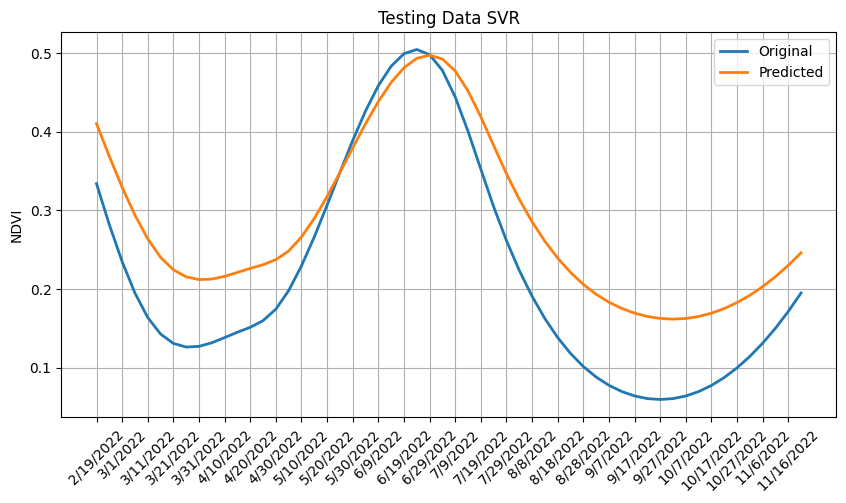

In [16]:
#Plot Testing Data
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y_test, linewidth=2, label = 'Original')
ax.plot(y_pred, linewidth=2, label = 'Predicted')
ax.set_xticks(range(0, len(test_dates.values), 2))
ax.set_xticklabels(test_dates.values[::2], rotation=45)

ax.set_title('Testing Data SVR')
ax.set_ylabel('NDVI')
ax.legend()
ax.grid(True)
plt.show()